In [1]:
import pandas as pd 
import string
import seaborn as sns
import stanza
from nltk.tokenize import sent_tokenize, word_tokenize
import simplemma
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)

## Short EDA

In [2]:
df = pd.read_csv('balanced_offensive.csv')
df = df.iloc[:,[1,0]]
df.head(10)

,label,text
0,1,"Майже всі дівчата хочуть бути охрініті, але при цьому вони все ще примусово зараховуються до спі..."
1,1,"Що афігенніше за те, щоб принести пару афігенних бабусь на свою зустріч з батьками?"
2,0,"Нє, ну коли пішли теми про наркоманів, я трималася, але зараз вже про Лінукс і С++"
3,0,"Дякую, чомусь саме така картинка в голові)"
4,0,"якщо в трендах твіттера є фанати Джастіна Бібера, отже, у світі все спокійно"
5,0,"У нас на смотріспорт падає трансляція. Є ще варіанти, де подивитись?"
6,0,"до речі, частина моїх одногрупників обурювались сильною дискримінацією в Голівуді та ТБ"
7,1,"Батьки, які розбалували дітей і вони ридають і кричать на весь ТЦ через будь-яку дрібницю, йдіть..."
8,0,Різдвяний омномном - чай з згущеним молоком:)
9,0,"ОЛЯ, ТИ ШО НЕ МОЖЕШ НОРМАЛЬНО СФОТКАТИ????"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8700 non-null   int64 
 1   text    8700 non-null   object
dtypes: int64(1), object(1)
memory usage: 136.1+ KB


In [4]:
df.drop_duplicates(inplace=True)
df.shape

(8683, 2)

In [5]:
df.groupby('label').describe().reset_index()

label  text         \
        count unique   
0     0  4350   4350   
1     1  4333   4333   

                                                                                                        \
                                                                                                   top   
0                   Нє, ну коли пішли теми про наркоманів, я трималася, але зараз вже про Лінукс і С++   
1  Майже всі дівчата хочуть бути охрініті, але при цьому вони все ще примусово зараховуються до спі...   

        
  freq  
0    1  
1    1

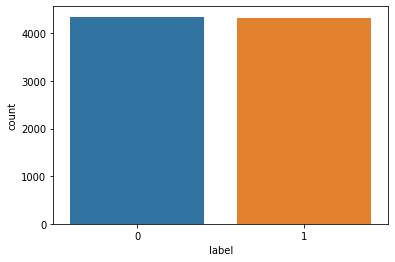

In [6]:
sns.countplot(x = df['label'], label='label');

## Text Preprocessing

In [7]:
# Ukrainian Stopwords

with open('ukr_stopwords.txt') as fin:
    ukr_stop_words = fin.readlines()
ukr_stop_words = list(set([w.strip() for w in ukr_stop_words]))

In [8]:
def text_preprocessing(text):
    
    lower_text = [i.lower() for i in text]
    no_english = [i for i in lower_text if i not in list(string.ascii_letters)]
    no_punct = [i for i in no_english if i not in list(string.punctuation)]
    no_punct = "".join(no_punct)
    result = [i for i in no_punct.split() if i not in ukr_stop_words]
    return " ".join(result)

In [9]:
df['text_preprocessed']= df['text'].apply(lambda x: text_preprocessing(x))
df

,label,text,text_preprocessed
0,1,"Майже всі дівчата хочуть бути охрініті, але при цьому вони все ще примусово зараховуються до спі...",дівчата хочуть охрініті примусово зараховуються співання пісень відценну пару
1,1,"Що афігенніше за те, щоб принести пару афігенних бабусь на свою зустріч з батьками?",афігенніше принести пару афігенних бабусь зустріч батьками
2,0,"Нє, ну коли пішли теми про наркоманів, я трималася, але зараз вже про Лінукс і С++",нє пішли теми наркоманів трималася лінукс
3,0,"Дякую, чомусь саме така картинка в голові)",картинка голові
4,0,"якщо в трендах твіттера є фанати Джастіна Бібера, отже, у світі все спокійно",трендах твіттера фанати джастіна бібера світі спокійно
...,...,...,...
8694,0,"я там тільки Феномен знаю. Хоча знаю, що є й щось інше",феномен знаю знаю
8695,1,"Добре перділо буде, якщо ти залишишся вдома!",перділо залишишся вдома
8696,0,"Мені дуже хотілось на роботу,до того моменту,як довелось вийти на вулицю.",хотілось роботудо моментуяк довелось вийти вулицю
8697,1,"Якщо ти не зможеш зрадоєбно працювати, то просто відправляйся на пошуки іншої роботи!",зможеш зрадоєбно працювати відправляйся пошуки роботи


In [10]:
def token_lemma(text):
    tknzd_text = word_tokenize(text)
    lemmas = [simplemma.lemmatize(t, lang='uk') for t in tknzd_text]
    return lemmas

In [11]:
df['tokenized_lemmatized']= df['text_preprocessed'].apply(lambda x: token_lemma(x))
df

,label,text,text_preprocessed,tokenized_lemmatized
0,1,"Майже всі дівчата хочуть бути охрініті, але при цьому вони все ще примусово зараховуються до спі...",дівчата хочуть охрініті примусово зараховуються співання пісень відценну пару,"[дівчата, хотіти, охрініті, примусова, зараховувати, співання, пісня, відценну, пара]"
1,1,"Що афігенніше за те, щоб принести пару афігенних бабусь на свою зустріч з батьками?",афігенніше принести пару афігенних бабусь зустріч батьками,"[афігенніша, принести, пара, афігенних, бабуся, зустріч, батьки]"
2,0,"Нє, ну коли пішли теми про наркоманів, я трималася, але зараз вже про Лінукс і С++",нє пішли теми наркоманів трималася лінукс,"[нє, піти, тема, наркоман, триматися, лінукс]"
3,0,"Дякую, чомусь саме така картинка в голові)",картинка голові,"[картинка, голова]"
4,0,"якщо в трендах твіттера є фанати Джастіна Бібера, отже, у світі все спокійно",трендах твіттера фанати джастіна бібера світі спокійно,"[трендах, твіттера, фанати, джастіна, бібера, світ, спокійно]"
...,...,...,...,...
8694,0,"я там тільки Феномен знаю. Хоча знаю, що є й щось інше",феномен знаю знаю,"[феномен, знати, знати]"
8695,1,"Добре перділо буде, якщо ти залишишся вдома!",перділо залишишся вдома,"[перділо, залишитися, вдома]"
8696,0,"Мені дуже хотілось на роботу,до того моменту,як довелось вийти на вулицю.",хотілось роботудо моментуяк довелось вийти вулицю,"[хотітися, роботудо, момент, довестися, вийти, вулиця]"
8697,1,"Якщо ти не зможеш зрадоєбно працювати, то просто відправляйся на пошуки іншої роботи!",зможеш зрадоєбно працювати відправляйся пошуки роботи,"[змогти, зрадоєбно, працювати, відправляти, пошук, робота]"


In [12]:
#Checking for NaNs

df['tokenized_lemmatized'].replace('', np.nan, inplace=True)
print(len(df))
df= df[df['tokenized_lemmatized'].notna()]
print(len(df))

8683
8683


In [13]:
df['length']= df['tokenized_lemmatized'].apply(lambda x: len(x))
df['tokenized_lemmatized']= df['tokenized_lemmatized'].apply(lambda x: ' '.join(x))
df

,label,text,text_preprocessed,tokenized_lemmatized,length
0,1,"Майже всі дівчата хочуть бути охрініті, але при цьому вони все ще примусово зараховуються до спі...",дівчата хочуть охрініті примусово зараховуються співання пісень відценну пару,дівчата хотіти охрініті примусова зараховувати співання пісня відценну пара,9
1,1,"Що афігенніше за те, щоб принести пару афігенних бабусь на свою зустріч з батьками?",афігенніше принести пару афігенних бабусь зустріч батьками,афігенніша принести пара афігенних бабуся зустріч батьки,7
2,0,"Нє, ну коли пішли теми про наркоманів, я трималася, але зараз вже про Лінукс і С++",нє пішли теми наркоманів трималася лінукс,нє піти тема наркоман триматися лінукс,6
3,0,"Дякую, чомусь саме така картинка в голові)",картинка голові,картинка голова,2
4,0,"якщо в трендах твіттера є фанати Джастіна Бібера, отже, у світі все спокійно",трендах твіттера фанати джастіна бібера світі спокійно,трендах твіттера фанати джастіна бібера світ спокійно,7
...,...,...,...,...,...
8694,0,"я там тільки Феномен знаю. Хоча знаю, що є й щось інше",феномен знаю знаю,феномен знати знати,3
8695,1,"Добре перділо буде, якщо ти залишишся вдома!",перділо залишишся вдома,перділо залишитися вдома,3
8696,0,"Мені дуже хотілось на роботу,до того моменту,як довелось вийти на вулицю.",хотілось роботудо моментуяк довелось вийти вулицю,хотітися роботудо момент довестися вийти вулиця,6
8697,1,"Якщо ти не зможеш зрадоєбно працювати, то просто відправляйся на пошуки іншої роботи!",зможеш зрадоєбно працювати відправляйся пошуки роботи,змогти зрадоєбно працювати відправляти пошук робота,6


In [14]:
# Saving processed text to .csv

df = df.drop(['text', 'text_preprocessed'], axis = 1)
df = df.rename(columns={'tokenized_lemmatized': 'text_processed'})
df.to_csv('processed_dataset.csv', index=False)

## Length of the processed messages and vocabulary

In [15]:
words_count_dict = df.text_processed.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).astype(int).sort_values(ascending=False)
words_count_dict

зробити          424
мудак            411
лох              405
шо               340
нахуй            329
                ... 
снігоочисну        1
кідрука            1
склеп              1
міша               1
незадоволений      1
Length: 17949, dtype: int64

In [16]:
df.length.describe()

count    8683.000000
mean        6.026834
std         3.197823
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        34.000000
Name: length, dtype: float64

In [17]:
df.length.sort_values(ascending=False)

4901    34
4822    31
7979    29
3300    29
4099    28
        ..
7329     1
2329     1
7359     1
4611     1
1842     1
Name: length, Length: 8683, dtype: int64

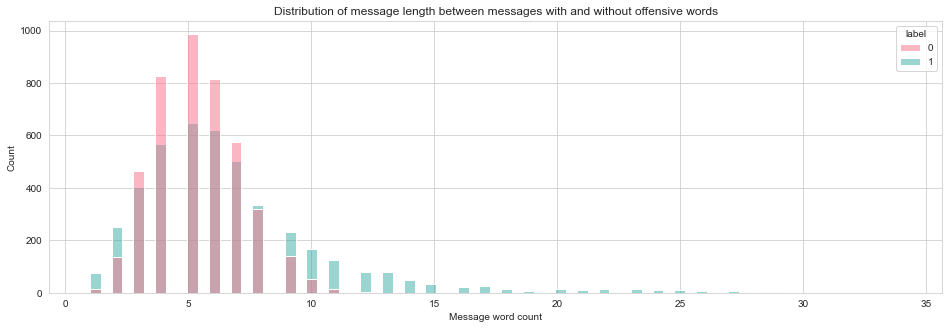

In [18]:
# Plot message length

sns.set_style("whitegrid")

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,5))
sns.histplot(data=df, 
             x='length',
             hue="label",
             palette='husl',
             bins=75,
             ax=ax,
             legend=True).set_title('Distribution of message length between messages with and without offensive words')
ax.set_xlabel('Message word count')
ax.set_ylabel('Count')
colors = sns.color_palette('husl')

## TensorFlow

In [19]:
# spec = model_spec.get('average_word_vec')
# spec.num_words = 2500
# spec.seq_len = 22
# spec.wordvec_dim = 7 

In [20]:
# # load data
# data = DataLoader.from_csv(
#       filename='/content/drive/MyDrive/ai-house-block-2-module-2-UA-Antispam-Bot/data/processed/processed_data.csv',
#       text_column='processed_message', 
#       label_column='Category', 
#       model_spec=spec,
#       delimiter=',',
#       shuffle=True,
#       is_training=True)

# # splitting data
# train_data, test_data = data.split(0.8)

In [21]:
# # fit model
# model = text_classifier.create(train_data, model_spec=spec, epochs=50)

In [22]:
# # accuracy check
# loss, accuracy = model.evaluate(test_data)

In [23]:
# # save model
# model.export(
#     export_dir='/content/drive/MyDrive/ai-house-block-2-module-2-UA-Antispam-Bot/data/models/averageWordVec-model',
#     tflite_filename='model.tflite',
#     label_filename='labels',
#     vocab_filename='vocab',
#     saved_model_filename='saved_model',
#     tfjs_folder_name='tfjs',
#     export_format=[ExportFormat.TFLITE, ExportFormat.LABEL, ExportFormat.VOCAB, ExportFormat.SAVED_MODEL, ExportFormat.TFJS]
# )